<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Reading a csv file
Before you analyze data, you will need to read the data into a pandas DataFrame. In this exercise, you will be looking at data from US School Improvement Grants in 2010. This program gave nearly $4B to schools to help them renovate or improve their programs.

This first step in most data analysis is to import pandas and seaborn and read a data file in order to analyze it further.

* Import pandas and seaborn using the standard naming conventions.
* The path to the csv file is stored in the grant_file variable.
* Use pandas to read the file.
* Store the resulting DataFrame in the variable df.


In [8]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv('schoolimprovement2010grants.csv')
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


# Comparing a histogram and distplot
The pandas library supports simple plotting of data, which is very convenient when data is already likely to be in a pandas DataFrame.

Seaborn generally does more statistical analysis on data and can provide more sophisticated insight into the data. In this exercise, we will compare a pandas histogram vs the seaborn distplot.

* Use the pandas' plot.hist() function to plot a histogram of the Award_Amount column.
* Use Seaborn's distplot() function to plot a distribution plot of the same column.

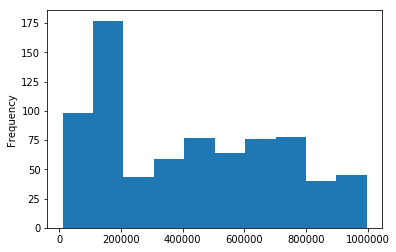

<Figure size 432x288 with 0 Axes>

In [9]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


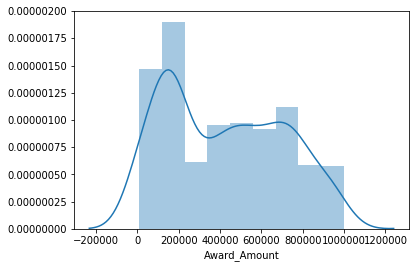

<Figure size 432x288 with 0 Axes>

In [10]:
# Display a Seaborn distplot
sns.distplot(df['Award_Amount'])
plt.show()

# Clear the distplot
plt.clf()

# Plot a histogram
The distplot() function will return a Kernel Density Estimate (KDE) by default. The KDE helps to smooth the distribution and is a useful way to look at the data. However, Seaborn can also support the more standard histogram approach if that is more meaningful for your analysis.

* Create a distplot for the data and disable the KDE.
* Explicitly pass in the number 20 for the number of bins in the histogram.
* Display the plot using plt.show().

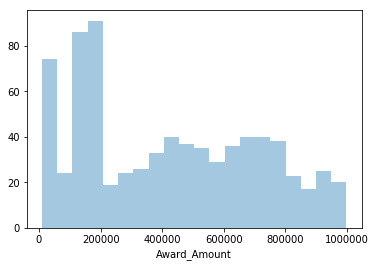

In [11]:
# Create a distplot
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

# Rug plot and kde shading
Now that you understand some function arguments for distplot(), we can continue further refining the output. This process of creating a visualization and updating it in an incremental fashion is a useful and common approach to look at data from multiple perspectives.

Seaborn excels at making this process simple.

* Create a distplot of the Award_Amount column in the df.
* Configure it to show a shaded kde (using the kde_kws dictionary).
* Add a rug plot above the x axis.
* Display the plot.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


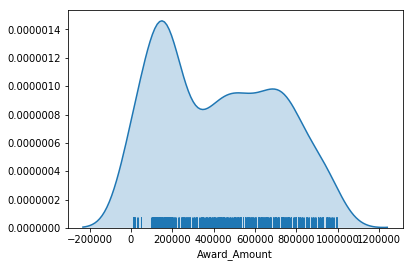

In [12]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

# Create a regression plot
For this set of exercises, we will be looking at FiveThirtyEight's data on which US State has the worst drivers. The data set includes summary level information about fatal accidents as well as insurance premiums for each state as of 2010.

In this exercise, we will look at the difference between the regression plotting functions. The data is available in the dataframe called df.

* Create a regression plot using regplot() with "insurance_losses" on the x axis and "premiums" on the y axis.
* Create a regression plot using lmplot() for the same data.
* Display the plot.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


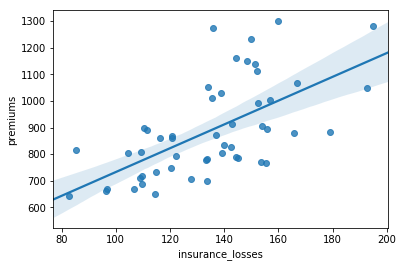

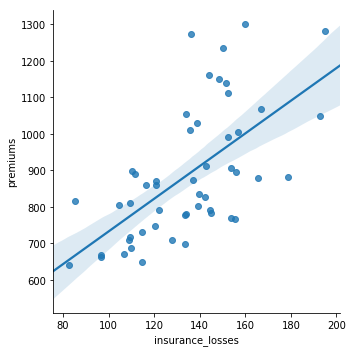

In [15]:
df = pd.read_csv('insurance_premiums.csv')

sns.regplot(data=df,
         x="insurance_losses",
         y="premiums")

# Display the plot
plt.show()

sns.lmplot(data=df,
         x="insurance_losses",
         y="premiums")

# Display the plot
plt.show()

# Plotting multiple variables
Since we are using lmplot() now, we can look at the more complex interactions of data. This data set includes geographic information by state and area. It might be interesting to see if there is a difference in relationships based on the Region of the country.

* Use lmplot() to look at the relationship between insurance_losses and premiums.
* Plot a regression line for each Region of the country.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


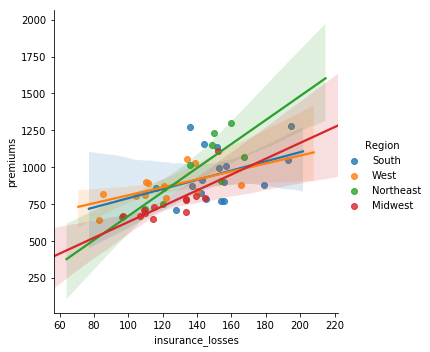

In [16]:
# Create a regression plot using hue
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           hue="Region")

# Show the results
plt.show()

# Facetting multiple regressions
lmplot() allows us to facet the data across multiple rows and columns. In the previous plot, the multiple lines were difficult to read in one plot. We can try creating multiple plots by Region to see if that is a more useful visualization.

* Use lmplot() to look at the relationship between insurance_losses and premiums.
* Create a plot for each Region of the country.
* Display the plots across multiple rows.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


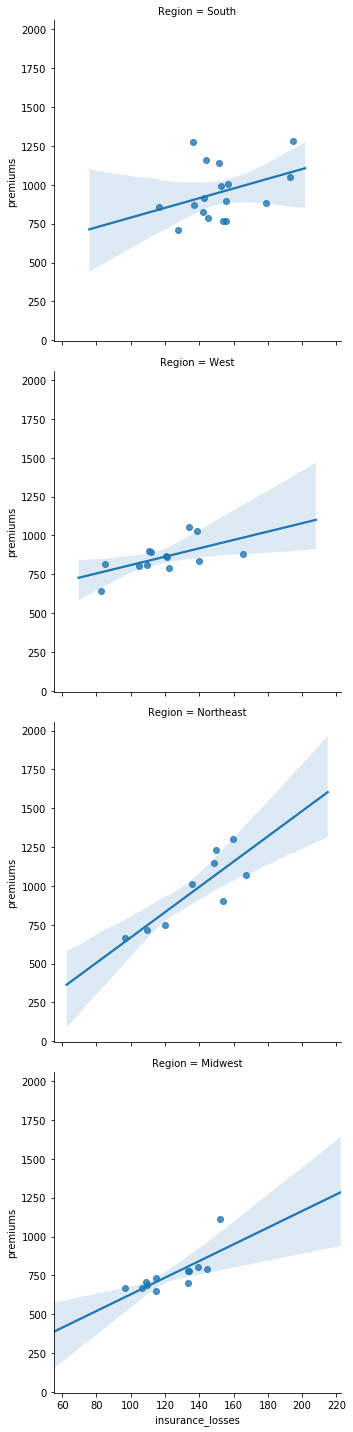

In [17]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row ="Region")

# Show the plot
plt.show()

# Setting the default style
For these exercises, we will be looking at fair market rent values calculated by the US Housing and Urban Development Department. This data is used to calculate guidelines for several federal programs. The actual values for rents vary greatly across the US. We can use this data to get some experience with configuring Seaborn plots.

All of the necessary imports for seaborn, pandas and matplotlib have been completed. The data is stored in the pandas DataFrame df.

* Plot a pandas histogram without adjusting the style.
* Set Seaborn's default style.
* Create another pandas histogram of the fmr_2 column which represents fair market rent for a 2-bedroom apartment.

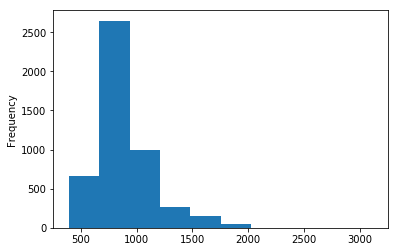

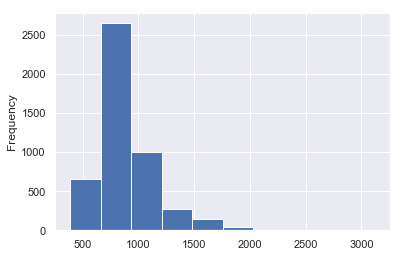

<Figure size 432x288 with 0 Axes>

In [20]:
df = pd.read_csv('US Housing and Urban Development FY 2018 Fair Market Rent.csv')

# Plot the pandas histogram
df['fmr_2'].plot.hist()
plt.show()
# plt.clf()

# # Set the default seaborn style
sns.set()

# Plot the pandas histogram again
df['fmr_2'].plot.hist()
plt.show()
plt.clf()

# Comparing styles
Seaborn supports setting different styles that can control the aesthetics of the final plot. In this exercise, you will plot the same data in two different styles in order to see how the styles change the output.

* Create a distplot() of the fmr_2 column using a dark style.
* Create the same distplot() using the whitegrid style.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


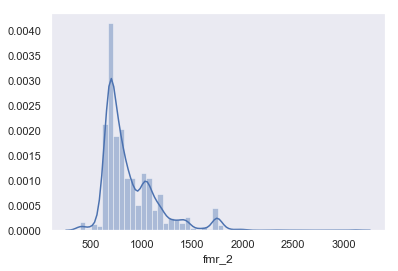

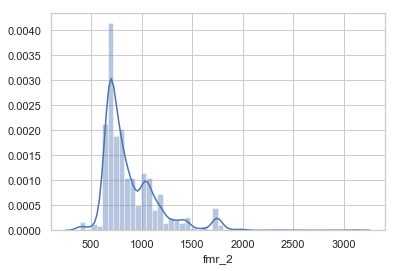

<Figure size 432x288 with 0 Axes>

In [22]:
# Plot with a dark style 
sns.set_style('dark')
sns.distplot(df['fmr_2'])
plt.show()

# Clear the figure
plt.clf()

# Plot with a dark style 
sns.set_style('whitegrid')
sns.distplot(df['fmr_2'])
plt.show()

# Clear the figure
plt.clf()

# Removing spines
In general, visualizations should minimize extraneous markings so that the data speaks for itself. Seaborn allows you to remove the lines on the top, bottom, left and right axis, which are often called spines.

* Use a white style for the plot.
* Create a lmplot() comparing the pop2010 and the fmr_2 columns.
* Remove the top and right spines using despine().

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


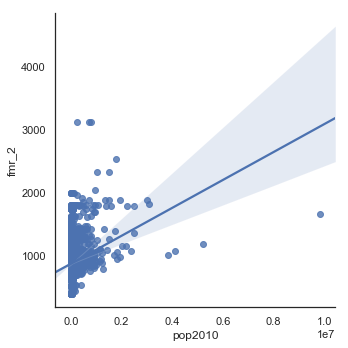

<Figure size 432x288 with 0 Axes>

In [24]:
# Set the style to white
sns.set_style('white')

# Create a regression plot
sns.lmplot(data=df,
           x='pop2010',
           y='fmr_2')

# Remove the spines
sns.despine(top=True, right=True)

# Show the plot and clear the figure
plt.show()
plt.clf()

# Matplotlib color codes
Seaborn offers several options for modifying the colors of your visualizations. The simplest approach is to explicitly state the color of the plot. A quick way to change colors is to use the standard matplotlib color codes.

* Set the default Seaborn style and enable the matplotlib color codes.
* Create a distplot for the fmr_3 column using matplotlib's magenta (m) color code.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


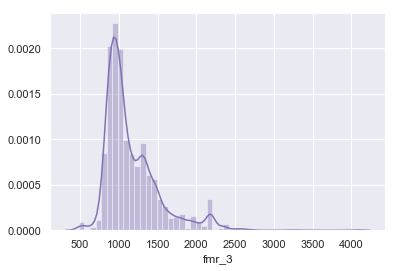

In [25]:
# Set style, enable color code, and create a magenta distplot
sns.set(color_codes=True)
sns.distplot(df['fmr_3'], color='m')

# Show the plot
plt.show()

# Using default palettes
Seaborn includes several default palettes that can be easily applied to your plots. In this example, we will look at the impact of two different palettes on the same distplot.

* Create a for loop to show the difference between the bright and colorblind palette.
* Set the palette using the set_palette() function.
* Use a distplot of the fmr_3 column.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


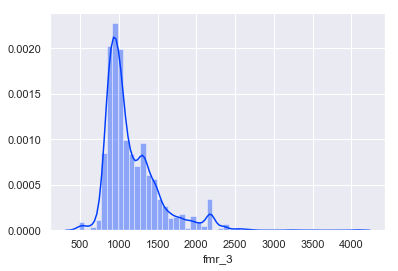

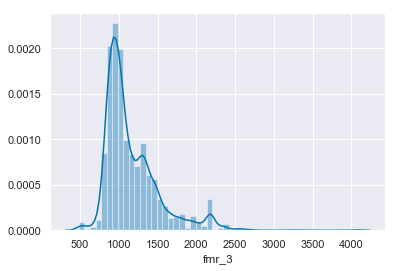

<Figure size 432x288 with 0 Axes>

In [26]:
# Loop through differences between bright and colorblind palettes
for p in ['bright', 'colorblind']:
    sns.set_palette(p)
    sns.distplot(df['fmr_3'])
    plt.show()
    
    # Clear the plots    
    plt.clf()

# Creating Custom Palettes
Choosing a cohesive palette that works for your data can be time consuming. Fortunately, Seaborn has several functions that allow you to create your own custom sequential, categorical, or diverging palettes. Seaborn also makes it easy to see your palettes by using the palplot() function.

In this exercise, you can experiment with creating different palettes.

* Create and display a Purples sequential palette containing 8 colors.
* Create and display a palette with 10 colors using the husl system.
* Create and display a diverging palette with 6 colors coolwarm.

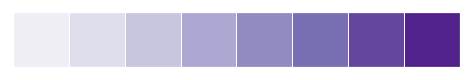

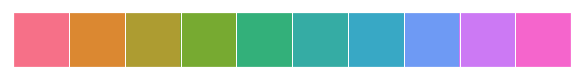

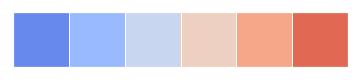

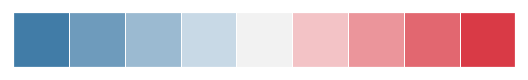

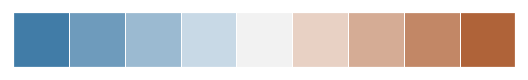

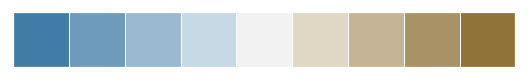

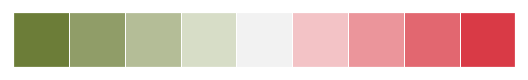

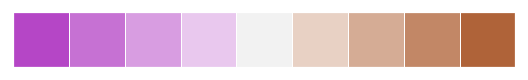

In [36]:
# Create the Purples palette
sns.palplot(sns.color_palette("Purples", 8))
plt.show()

# Create the husl palette
sns.palplot(sns.color_palette("husl", 10))
plt.show()

# Create the coolwarm palette
sns.palplot(sns.color_palette("coolwarm", 6))
plt.show()

# Diverging pallete
sns.palplot(sns.diverging_palette(240, 10, n=9))
sns.palplot(sns.diverging_palette(240, 30, n=9))
sns.palplot(sns.diverging_palette(240, 60, n=9))
sns.palplot(sns.diverging_palette(100, 10, n=9))
sns.palplot(sns.diverging_palette(300, 30, n=9))

# Using matplotlib axes
Seaborn uses matplotlib as the underlying library for creating plots. Most of the time, you can use the Seaborn API to modify your visualizations but sometimes it is helpful to use matplotlib's functions to customize your plots. The most important object in this case is matplotlib's axes.

Once you have an axes object, you can perform a lot of customization of your plot.

In these example, the US HUD data is loaded in the dataframe df and all libraries are imported.

* Use plt.subplots() to create a axes and figure objects.
* Plot a distplot of column fmr_3 on the axes.
* Set a more useful label on the x axis of "3 Bedroom Fair Market Rent".

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


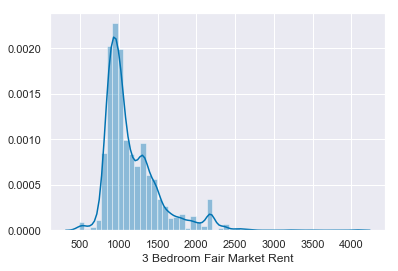

In [37]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of data
sns.distplot(df['fmr_3'], ax=ax)

# Create a more descriptive x axis label
ax.set(xlabel="3 Bedroom Fair Market Rent")

# Show the plot
plt.show()

# Additional plot customizations
The matplotlib API supports many common customizations such as labeling axes, adding titles, and setting limits. Let's complete another customization exercise.

* Create a distplot of the fmr_1 column.
* Modify the x axis label to say "1 Bedroom Fair Market Rent".
* Change the x axis limits to be between 100 and 1500.
* Add a descriptive title of "US Rent" to the plot.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


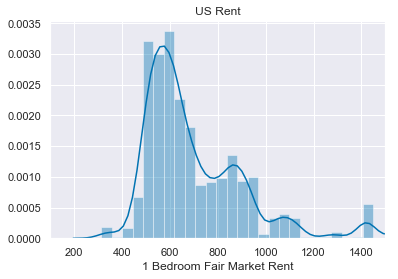

In [38]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

# Display the plot
plt.show()

# Adding annotations
Each of the enhancements we have covered can be combined together. In the next exercise, we can annotate our distribution plot to include lines that show the mean and median rent prices.

For this example, the palette has been changed to bright using sns.set_palette()

* Create a figure and axes.
* Plot the fmr_1 column distribution.
* Add a vertical line using axvline for the median and mean of the values which are already defined.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


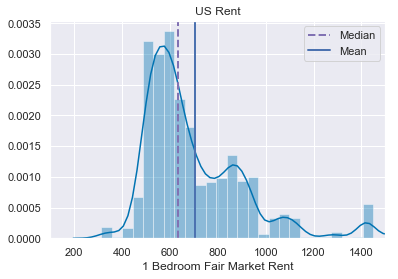

In [39]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.distplot(df['fmr_1'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500), title="US Rent")

# Add vertical lines for the median and mean
ax.axvline(x=df['fmr_1'].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df['fmr_1'].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# # Show the legend and plot the data
ax.legend()
plt.show()

# Multiple plots
For the final exercise we will plot a comparison of the fair market rents for 1-bedroom and 2-bedroom apartments.

* Create two axes objects, ax0 and ax1.
* Plot fmr_1 on ax0 and fmr_2 on ax1.
* Display the plots side by side.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


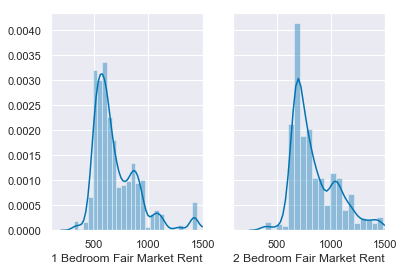

In [40]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True)

# Plot the distribution of 1 bedroom apartments on ax0
sns.distplot(df['fmr_1'], ax=ax0)
ax0.set(xlabel="1 Bedroom Fair Market Rent", xlim=(100,1500))

# Plot the distribution of 2 bedroom apartments on ax1
sns.distplot(df['fmr_2'], ax=ax1)
ax1.set(xlabel="2 Bedroom Fair Market Rent", xlim=(100,1500))

# Display the plot
plt.show()